# Anomaly Detection in Transactions

Aim: To build a detective model that can accurately distinguish legitimate transactions from potential anomalies, thus safeguarding the financial system from fraudulent activities and ensuring customer trust.


**About The Dataset:**

- The dataset contains information about various financial transactions, each represented by several features:

  - Transaction_ID: Unique identifier for each transaction.
  - Transaction_Amount: The monetary value of the transaction.
  - Transaction_Volume: The quantity or number of items/actions involved in the transaction.
  - Average_Transaction_Amount: The historical average transaction amount for the account.
  - Frequency_of_Transactions: How often transactions are typically performed by the account.
  - Time_Since_Last_Transaction: Time elapsed since the last transaction.
  - Day_of_Week: The day of the week when the transaction occurred.
  - Time_of_Day: The time of day when the transaction occurred.
  - Age: Age of the account holder.
  - Gender: Gender of the account holder.
  - Income: Income of the account holder.
  - Account_Type: Type of account (e.g., personal, business).st

In [ ]:
- Read and Explore the Dataset

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

In [32]:
anomalty = pd.read_csv("anomalies_dataset.csv")

In [36]:
anomalty.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


In [37]:
anomalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [38]:
anomalty.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

In [39]:
anomalty.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


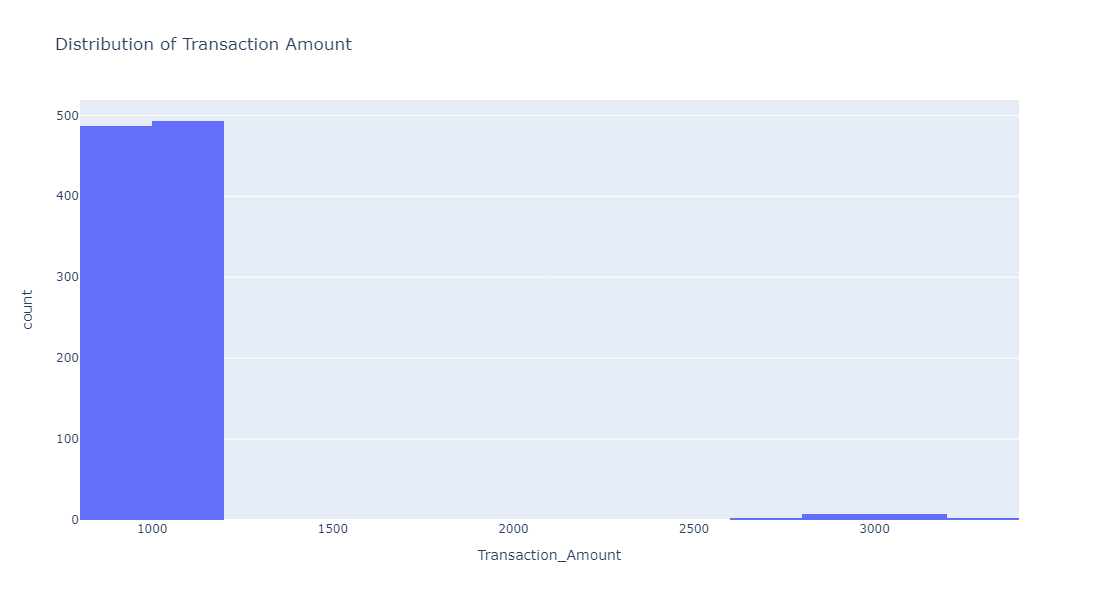

In [40]:
# Distribution of Transaction Amount

fig_amount = px.histogram(anomalty, x='Transaction_Amount', nbins=20, title='Distribution of Transaction Amount')
fig_amount.update_layout(width=1000, height=600)
fig_amount.show()

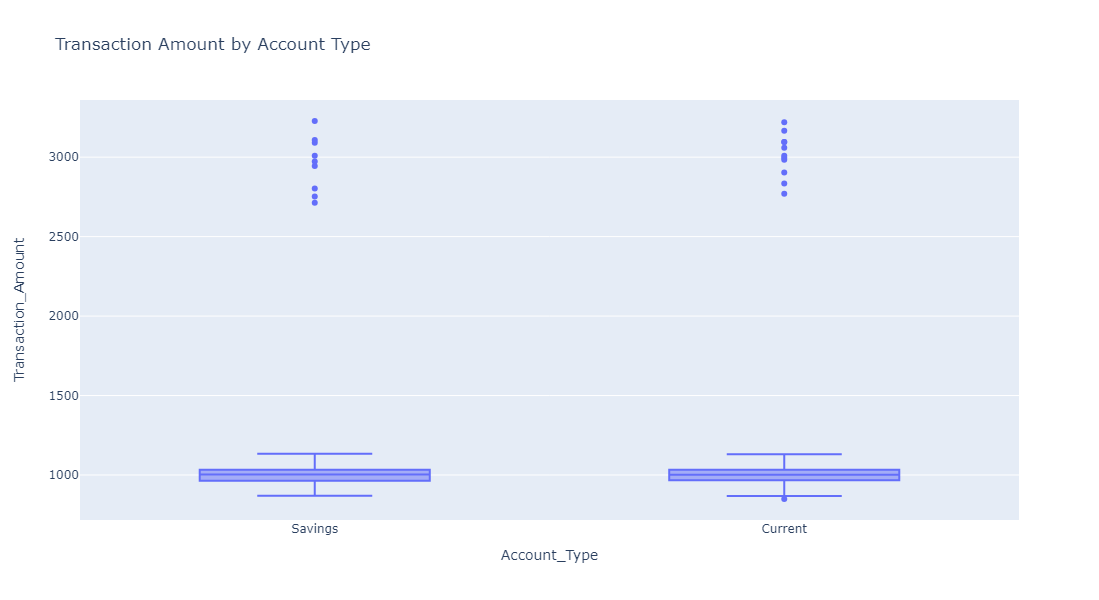

In [41]:
# Transaction Amount by Account Type

fig_box_amount = px.box(anomalty, x ='Account_Type', y='Transaction_Amount', title='Transaction Amount by Account Type')
fig_box_amount.update_layout(width=1000, height=600)

fig_box_amount.show()

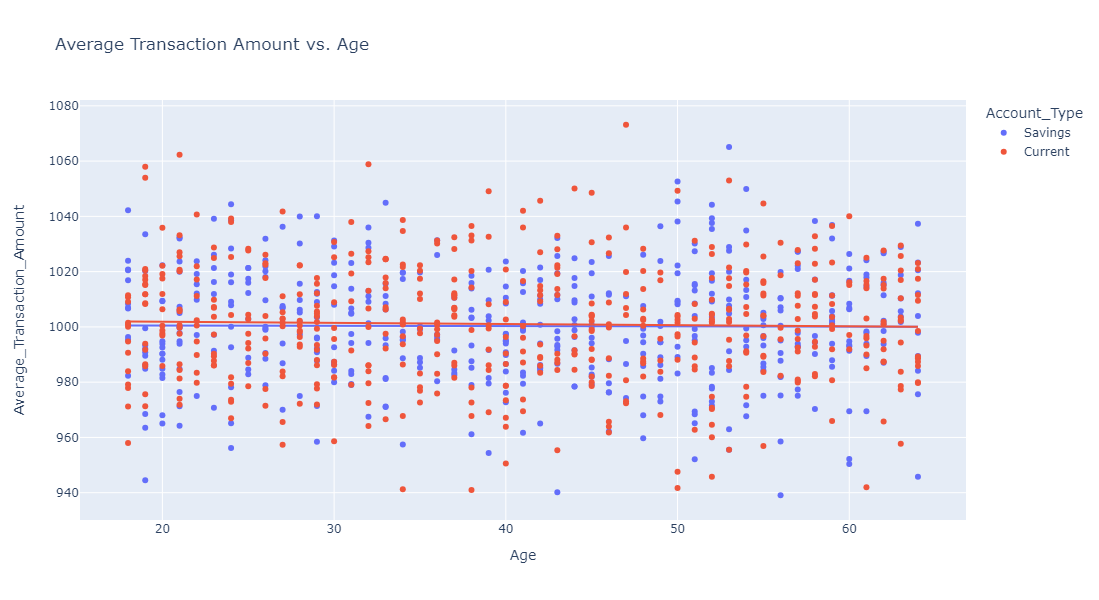

In [44]:
# Average Transaction Amount vs. Age
fig_scatter_avg_amount_age = px.scatter(anomalty, x='Age', y='Average_Transaction_Amount', color='Account_Type', title='Average Transaction Amount vs. Age', trendline='ols')
fig_scatter_avg_amount_age.update_layout(width=1000, height=600)

fig_scatter_avg_amount_age.show()

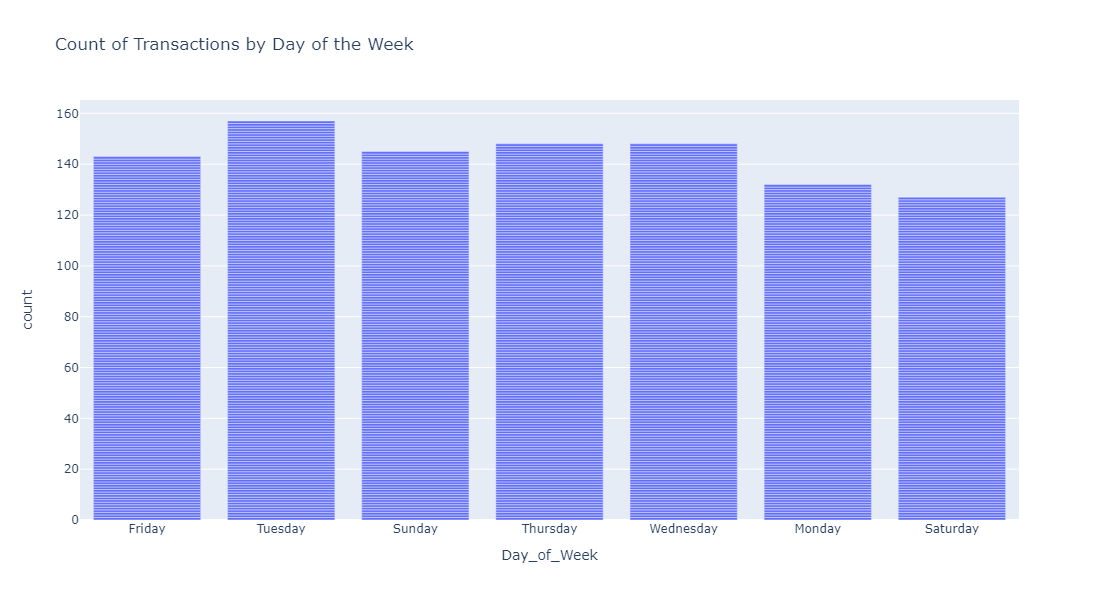

In [45]:
# Count of Transactions by Day of the Week

fig_day_of_week = px.bar(anomalty, x='Day_of_Week', title='Count of Transactions by Day of the Week')
fig_day_of_week.update_layout(width=1000, height=600)

fig_day_of_week.show()

C:\Users\BenJ\AppData\Local\Temp\ipykernel_11272\3375151536.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



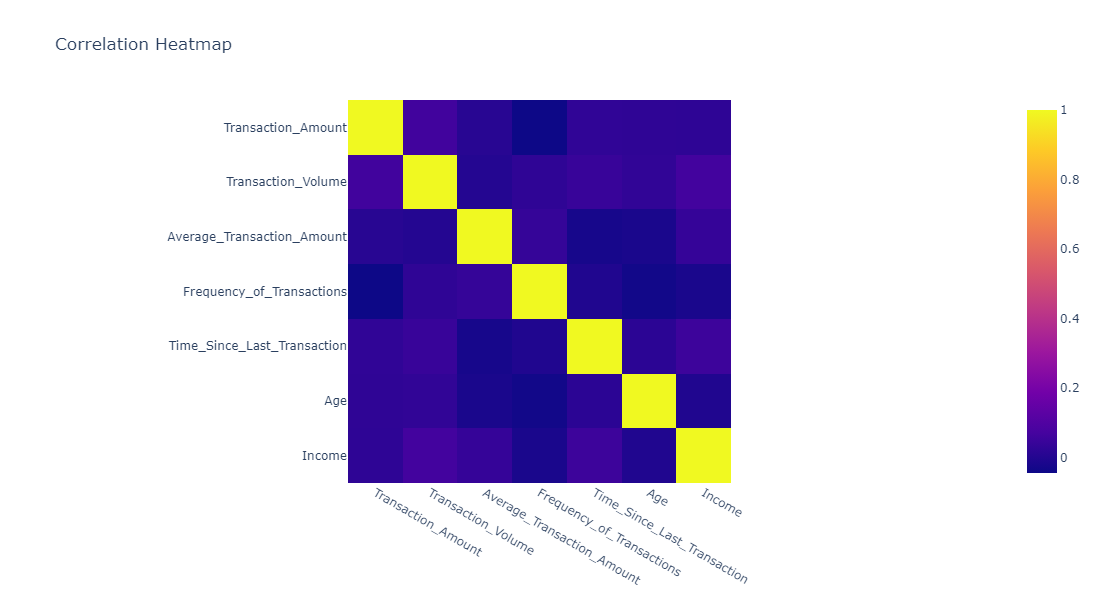

In [48]:
# Correlation Heatmap
correlation_matrix = anomalty.corr()
fig_corr_heatmap = px.imshow(correlation_matrix, title='Correlation Heatmap')
fig_corr_heatmap.update_layout(width=800, height=600)

fig_corr_heatmap.show()

In [50]:
# Calculate mean and standard deviation of Transaction Amount

mean_amount = anomalty['Transaction_Amount'].mean()
std_amount = anomalty['Transaction_Amount'].std()

In [51]:
mean_amount

1038.1225107502053

In [52]:
std_amount

283.5800547153556

In [53]:
# Define the anomaly threshold (2 standard deviations from the mean)

anomaly_threshold = mean_amount + 2 * std_amount

In [54]:
anomaly_threshold

1605.2826201809164

In [57]:
# Flag anomalies

anomalty['Is_Anomaly'] = anomalty['Transaction_Amount'] > anomaly_threshold

In [59]:
anomalty['Is_Anomaly'].sum()

20

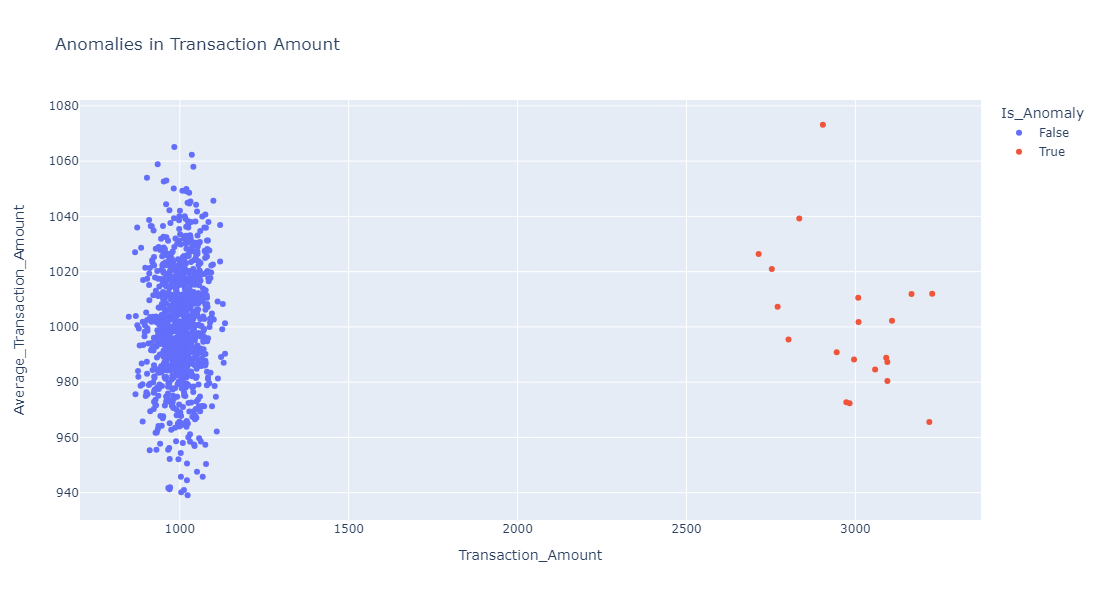

In [61]:
# Scatter plot of Transaction Amount with anomalies highlighted

fig_anomalies = px.scatter(anomalty, x='Transaction_Amount', y='Average_Transaction_Amount', color='Is_Anomaly', title='Anomalies in Transaction Amount')
fig_anomalies.update_traces(marker=dict(size=12), selector=dict(mode='markers', marker_size=1))
fig_anomalies.update_layout(width=1000, height=600)

fig_anomalies.show()

In [62]:
# Calculate the number of anomalies
num_anomalies = anomalty['Is_Anomaly'].sum()

In [63]:
num_anomalies

20

In [64]:
# Calculate the total number of instances in the dataset
total_instances = anomalty.shape[0]

In [65]:
total_instances

1000

In [66]:
# Calculate the ratio of anomalies

anomaly_ratio = num_anomalies / total_instances
print(anomaly_ratio)

0.02


- Training the model for detecting anomalies:

In [67]:
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

In [69]:
# Split data into features (X) and target variable (y)

X = anomalty[relevant_features]
y = anomalty['Is_Anomaly']

In [70]:
X.head()

,Transaction_Amount,Average_Transaction_Amount,Frequency_of_Transactions
0,1024.835708,997.234714,12
1,1013.952065,1020.210306,7
2,970.956093,989.496604,5
3,1040.822254,969.522480,16
4,998.777241,1007.111026,7


In [71]:
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Is_Anomaly, dtype: bool

In [72]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [73]:
# Train the Isolation Forest model

model = IsolationForest(contamination=0.02, random_state=42)

In [74]:
model.fit(X_train)

IsolationForest(contamination=0.02, random_state=42)

Thus, the dataset was plitted into features (X) and the target variable (y), where X contains the selected features and y contains the binary labels indicating whether an instance is an anomaly or not. Then, we further split the data into training and testing sets using a 70-30 split ratio. Next, we created an Isolation Forest model with a specified contamination parameter of 0.02 (indicating the expected ratio of anomalies) and a random seed for reproducibility. The model is then trained on the training set (X_train).

In [75]:
# Predict anomalies on the test set
y_pred = model.predict(X_test)

In [77]:
# y_pred

In [78]:
# Convert predictions to binary values (0: normal, 1: anomaly)

y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

In [81]:
# Evaluate the model's performance

print('Classification Report: ')
print(classification_report(y_test, y_pred_binary, target_names=['Normal', 'Anomaly']))

Classification Report: 
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       294
     Anomaly       1.00      1.00      1.00         6

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [82]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
    print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected: This transaction is normal.")

Enter the value for 'Transaction_Amount':  1000
Enter the value for 'Average_Transaction_Amount':  900
Enter the value for 'Frequency_of_Transactions':  6


No anomaly detected: This transaction is normal.
